<a href="https://colab.research.google.com/github/JudsonLima/computationalImaging/blob/master/TermProject_F2023_JL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Imaging Term project

Judson Lima

OPTI 556, Fall 2023

#Libraries

In [41]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files


from skimage import io
from skimage import color, data, restoration, exposure, filters

from scipy.signal import convolve2d, convolve
from scipy.signal import bspline


In [19]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/JudsonLima/computationalImaging/master/images/680nm_WP_CenterSlice1.png

--2023-12-12 00:51:41--  https://raw.githubusercontent.com/JudsonLima/computationalImaging/master/images/680nm_WP_CenterSlice1.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177263 (173K) [image/png]
Saving to: ‘680nm_WP_CenterSlice1.png.1’

680nm_WP_CenterSlic 100%[===================>] 173.11K  --.-KB/s    in 0.04s   

2023-12-12 00:51:41 (4.38 MB/s) - ‘680nm_WP_CenterSlice1.png.1’ saved [177263/177263]



In [20]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/JudsonLima/computationalImaging/master/images/705nm_skinSample_CenterSlice1.png

--2023-12-12 00:51:41--  https://raw.githubusercontent.com/JudsonLima/computationalImaging/master/images/705nm_skinSample_CenterSlice1.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 153164 (150K) [image/png]
Saving to: ‘705nm_skinSample_CenterSlice1.png’

705nm_skinSample_Ce 100%[===================>] 149.57K  --.-KB/s    in 0.04s   

2023-12-12 00:51:41 (3.96 MB/s) - ‘705nm_skinSample_CenterSlice1.png’ saved [153164/153164]



In [21]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/JudsonLima/computationalImaging/master/images/680nm_WP_CenterSlice2.png

--2023-12-12 00:51:41--  https://raw.githubusercontent.com/JudsonLima/computationalImaging/master/images/680nm_WP_CenterSlice2.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 166412 (163K) [image/png]
Saving to: ‘680nm_WP_CenterSlice2.png’

680nm_WP_CenterSlic 100%[===================>] 162.51K  --.-KB/s    in 0.04s   

2023-12-12 00:51:41 (4.27 MB/s) - ‘680nm_WP_CenterSlice2.png’ saved [166412/166412]



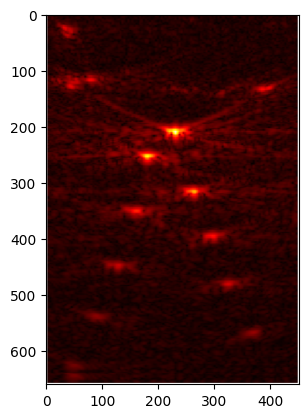

In [42]:
wireSplice = io.imread('680nm_WP_CenterSlice1.png')

plt.imshow(wireSplice, cmap='gray')

#plt.savefig('initialPhoto.pdf')
#files.download('initialPhoto.pdf')

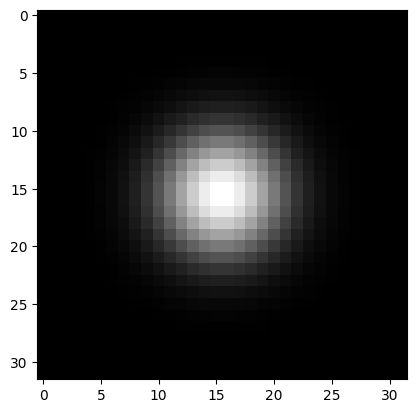

In [43]:
xrange=np.linspace(-3,3,32)
x,y=np.meshgrid(xrange,xrange)

psf = np.exp(-(x**2+y**2))

plt.imshow(psf)

In [39]:
grayScale_wireSplice = io.imread('680nm_WP_CenterSlice1.png', as_gray=True)


<ipython-input-40-b8bc0d7118df>:8: FutureWarning: `iterations` is a deprecated argument name for `richardson_lucy`. It will be removed in version 1.0. Please use `num_iter` instead.
  deconvolvedRL = restoration.richardson_lucy(wireSplice, psf, iterations=100)


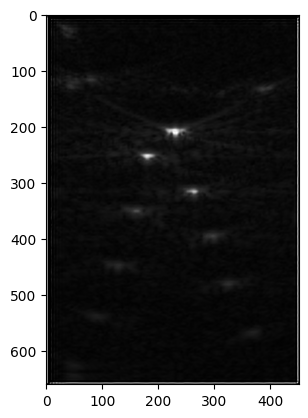

In [40]:
xrange=np.linspace(-3,3,16)
x,y=np.meshgrid(xrange,xrange)
psf = np.exp(-(x**2+y**2))
psf=psf/np.sum(np.sum(psf))
wireSplice = convolve2d(grayScale_wireSplice, psf, 'same')

deconvolvedRL = restoration.richardson_lucy(wireSplice, psf, iterations=100)

plt.imshow(deconvolvedRL)

#plt.savefig('16psf100iterations.pdf')
#files.download('16psf100iterations.pdf')

<ipython-input-26-b7bd9a486e7a>:8: FutureWarning: `iterations` is a deprecated argument name for `richardson_lucy`. It will be removed in version 1.0. Please use `num_iter` instead.
  deconvolvedRL = restoration.richardson_lucy(wireSplice, psf, iterations=100)


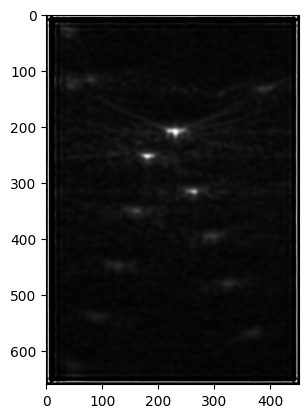

In [26]:
xrange=np.linspace(-3,3,32)
x,y=np.meshgrid(xrange,xrange)
psf = np.exp(-(x**2+y**2))
psf=psf/np.sum(np.sum(psf))
wireSplice = convolve2d(grayScale_wireSplice, psf, 'same')

deconvolvedRL = restoration.richardson_lucy(wireSplice, psf, iterations=100)

plt.imshow(deconvolvedRL)

#plt.savefig('32psf100iterations.pdf')
#files.download('32psf100iterations.pdf')

<ipython-input-27-b9c4be03be9f>:8: FutureWarning: `iterations` is a deprecated argument name for `richardson_lucy`. It will be removed in version 1.0. Please use `num_iter` instead.
  deconvolvedRL = restoration.richardson_lucy(wireSplice, psf, iterations=100)


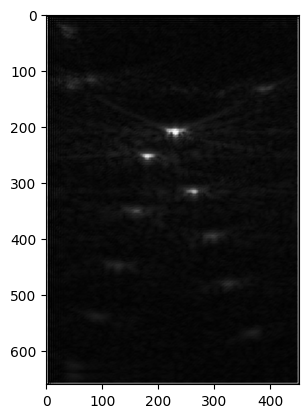

In [27]:
xrange=np.linspace(-3,3,12)
x,y=np.meshgrid(xrange,xrange)
psf = np.exp(-(x**2+y**2))
psf=psf/np.sum(np.sum(psf))
wireSplice = convolve2d(grayScale_wireSplice, psf, 'same')

deconvolvedRL = restoration.richardson_lucy(wireSplice, psf, iterations=100)

plt.imshow(deconvolvedRL)

#plt.savefig('12psf100iterations.pdf')
#files.download('12psf100iterations.pdf')

<ipython-input-28-126685d01e3c>:8: FutureWarning: `iterations` is a deprecated argument name for `richardson_lucy`. It will be removed in version 1.0. Please use `num_iter` instead.
  deconvolvedRL = restoration.richardson_lucy(wireSplice, psf, iterations=600)


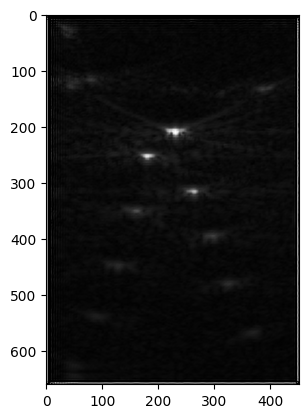

In [28]:
xrange=np.linspace(-3,3,16)
x,y=np.meshgrid(xrange,xrange)
psf = np.exp(-(x**2+y**2))
psf=psf/np.sum(np.sum(psf))
wireSplice = convolve2d(grayScale_wireSplice, psf, 'same')

deconvolvedRL = restoration.richardson_lucy(wireSplice, psf, iterations=600)

plt.imshow(deconvolvedRL)

#plt.savefig('16psf600iterations.pdf')
#files.download('16psf600iterations.pdf')

<ipython-input-29-821a13ecee6b>:8: FutureWarning: `iterations` is a deprecated argument name for `richardson_lucy`. It will be removed in version 1.0. Please use `num_iter` instead.
  deconvolvedRL = restoration.richardson_lucy(wireSplice, psf, iterations=600)


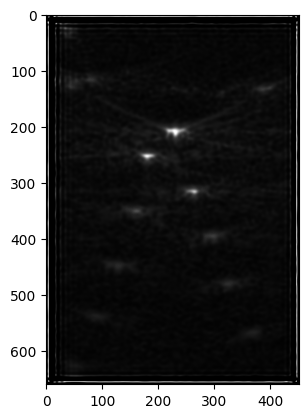

In [29]:
xrange=np.linspace(-3,3,32)
x,y=np.meshgrid(xrange,xrange)
psf = np.exp(-(x**2+y**2))
psf=psf/np.sum(np.sum(psf))
wireSplice = convolve2d(grayScale_wireSplice, psf, 'same')

deconvolvedRL = restoration.richardson_lucy(wireSplice, psf, iterations=600)

plt.imshow(deconvolvedRL)

#plt.savefig('32psf600iterations.pdf')
#files.download('32psf600iterations.pdf')

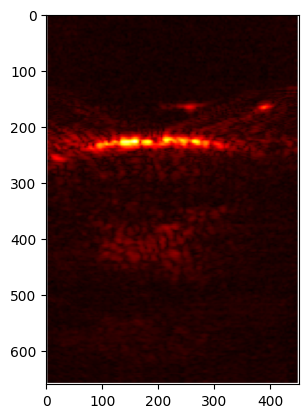

In [30]:
wireSplice = io.imread('705nm_skinSample_CenterSlice1.png')

plt.imshow(wireSplice, cmap='gray')

#plt.savefig('initialPhoto1.pdf')
#files.download('initialPhoto1.pdf')

In [31]:
grayScale_Skinsample = io.imread('705nm_skinSample_CenterSlice1.png', as_gray=True)


<ipython-input-32-d1ffcc9b14c9>:8: FutureWarning: `iterations` is a deprecated argument name for `richardson_lucy`. It will be removed in version 1.0. Please use `num_iter` instead.
  deconvolvedRL = restoration.richardson_lucy(wireSplice, psf, iterations=100)


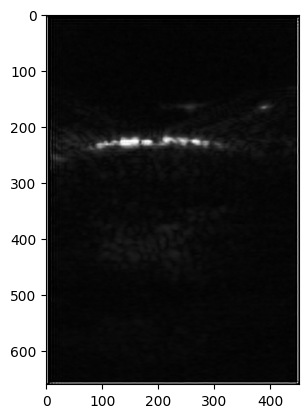

In [32]:
xrange=np.linspace(-3,3,16)
x,y=np.meshgrid(xrange,xrange)
psf = np.exp(-(x**2+y**2))
psf=psf/np.sum(np.sum(psf))
wireSplice = convolve2d(grayScale_Skinsample, psf, 'same')

deconvolvedRL = restoration.richardson_lucy(wireSplice, psf, iterations=100)

plt.imshow(deconvolvedRL)

#plt.savefig('16psf100iterations1.pdf')
#files.download('16psf100iterations1.pdf')

<ipython-input-33-96711d77e7c2>:8: FutureWarning: `iterations` is a deprecated argument name for `richardson_lucy`. It will be removed in version 1.0. Please use `num_iter` instead.
  deconvolvedRL = restoration.richardson_lucy(wireSplice, psf, iterations=100)


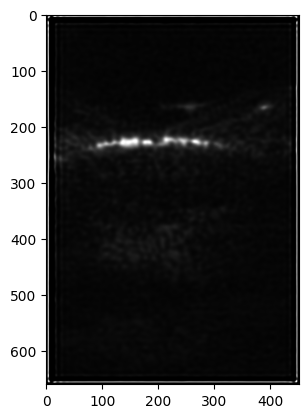

In [33]:
xrange=np.linspace(-3,3,32)
x,y=np.meshgrid(xrange,xrange)
psf = np.exp(-(x**2+y**2))
psf=psf/np.sum(np.sum(psf))
wireSplice = convolve2d(grayScale_Skinsample, psf, 'same')

deconvolvedRL = restoration.richardson_lucy(wireSplice, psf, iterations=100)

plt.imshow(deconvolvedRL)

#plt.savefig('32psf100iterations1.pdf')
#files.download('32psf100iterations1.pdf')

<ipython-input-34-f86b1d69fc2f>:8: FutureWarning: `iterations` is a deprecated argument name for `richardson_lucy`. It will be removed in version 1.0. Please use `num_iter` instead.
  deconvolvedRL = restoration.richardson_lucy(wireSplice, psf, iterations=100)


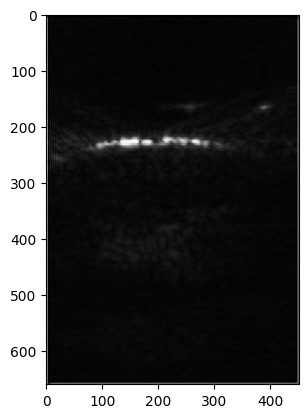

In [34]:
xrange=np.linspace(-3,3,12)
x,y=np.meshgrid(xrange,xrange)
psf = np.exp(-(x**2+y**2))
psf=psf/np.sum(np.sum(psf))
wireSplice = convolve2d(grayScale_Skinsample, psf, 'same')

deconvolvedRL = restoration.richardson_lucy(wireSplice, psf, iterations=100)

plt.imshow(deconvolvedRL)

#plt.savefig('12psf100iterations1.pdf')
#files.download('12psf100iterations1.pdf')

<ipython-input-35-5878588c7ee2>:8: FutureWarning: `iterations` is a deprecated argument name for `richardson_lucy`. It will be removed in version 1.0. Please use `num_iter` instead.
  deconvolvedRL = restoration.richardson_lucy(wireSplice, psf, iterations=600)


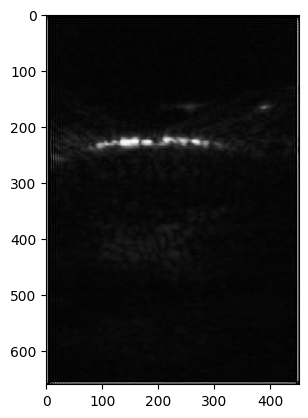

In [35]:
xrange=np.linspace(-3,3,16)
x,y=np.meshgrid(xrange,xrange)
psf = np.exp(-(x**2+y**2))
psf=psf/np.sum(np.sum(psf))
wireSplice = convolve2d(grayScale_Skinsample, psf, 'same')

deconvolvedRL = restoration.richardson_lucy(wireSplice, psf, iterations=600)

plt.imshow(deconvolvedRL)

#plt.savefig('16psf600iterations1.pdf')
#files.download('16psf600iterations1.pdf')

<ipython-input-36-45dd9b304a2e>:8: FutureWarning: `iterations` is a deprecated argument name for `richardson_lucy`. It will be removed in version 1.0. Please use `num_iter` instead.
  deconvolvedRL = restoration.richardson_lucy(wireSplice, psf, iterations=600)


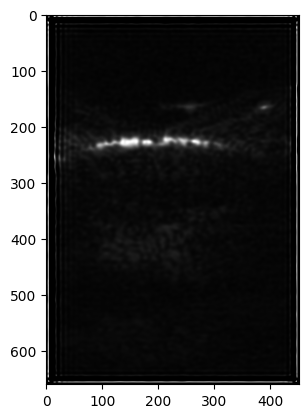

In [36]:
xrange=np.linspace(-3,3,32)
x,y=np.meshgrid(xrange,xrange)
psf = np.exp(-(x**2+y**2))
psf=psf/np.sum(np.sum(psf))
wireSplice = convolve2d(grayScale_Skinsample, psf, 'same')

deconvolvedRL = restoration.richardson_lucy(wireSplice, psf, iterations=600)

plt.imshow(deconvolvedRL)

#plt.savefig('32psf600iterations1.pdf')
#files.download('32psf600iterations1.pdf')